In [1]:
%matplotlib inline


# Gaussian Mixture Model Ellipsoids


Plot the confidence ellipsoids of a mixture of two Gaussians
obtained with Expectation Maximisation (``GaussianMixture`` class) and
Variational Inference (``BayesianGaussianMixture`` class models with
a Dirichlet process prior).

Both models have access to five components with which to fit the data. Note
that the Expectation Maximisation model will necessarily use all five
components while the Variational Inference model will effectively only use as
many as are needed for a good fit. Here we can see that the Expectation
Maximisation model splits some components arbitrarily, because it is trying to
fit too many components, while the Dirichlet Process model adapts it number of
state automatically.

This example doesn't show it, as we're in a low-dimensional space, but
another advantage of the Dirichlet process model is that it can fit
full covariance matrices effectively even when there are less examples
per cluster than there are dimensions in the data, due to
regularization properties of the inference algorithm.


In [2]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook,show,output_file,save
from bokeh.charts import Scatter


In [19]:
output_notebook()

Loading BokehJS ...

In [3]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
from sklearn.decomposition import PCA

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


In [112]:
from matplotlib import gridspec
import seaborn as sns

In [34]:
def plot_results(X, Y_, means, covariances, index, title):
    plt.figure(figsize=(20,20))  #
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim([-2000,2000])
    plt.ylim([-1000,1000])
    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

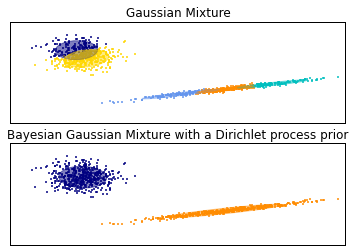

In [5]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

In [1]:
X.shape

NameError: name 'X' is not defined

In [9]:
########################### get some spikes ##############################

In [5]:
import os

In [6]:
os.getcwd()

'/Users/guitchounts1/Documents/Ephys_Data/GRat18/636151800793559606/ChGroup_13'

In [5]:
spikes_path = '/Users/guitchounts/Documents/Data/grat21/636213969321601134/ChGroup_1/Spikes'

spikes_file = open(spikes_path,"rb")

spikes = np.fromfile(spikes_file,dtype=np.int16)

spikes_file.close

<function close>

In [6]:
spikes.shape

(7120266240,)

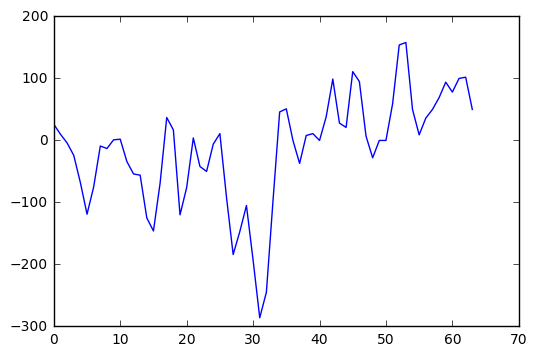

In [7]:
plt.plot(spikes[0:256:4]) #### looks like the values are arranged [ch0,ch1,ch2,ch3;ch0,ch1,ch2,ch3...]

In [7]:
spikes = np.reshape(spikes,[4,64,len(spikes)/(4*64)],'F')

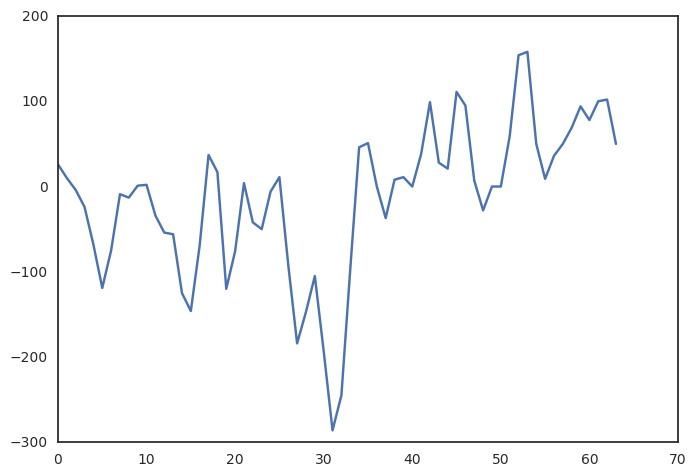

In [285]:
plt.plot(spikes[0,:,0])

In [ ]:
plt.savefig()

In [280]:
print spikes[0,:,0]

[  26   10   -4  -24  -68 -119  -75   -9  -13    1    2  -34  -54  -56 -125
 -146  -69   37   17 -120  -76    4  -42  -50   -6   11  -92 -184 -147 -105
 -193 -286 -245  -97   46   51    0  -37    8   11    0   38   99   28   21
  111   95    7  -28    0    0   59  154  158   50    9   36   50   69   94
   78  100  102   50]


In [8]:
peaks = spikes[:,31,:].T

In [9]:
peaks.shape

(27813540, 4)

In [84]:
ch23peaks = peaks[:,[1,2]]

In [89]:
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(reduced_data)


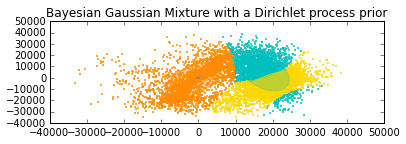

In [90]:
plot_results(reduced_data, dpgmm.predict(reduced_data), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')
plt.show()

In [32]:
pca = PCA(n_components=2)
pca.fit(peaks)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
reduced_data = PCA(n_components=2).fit_transform(peaks)

In [14]:
reduced_data.shape

(27813540, 2)

In [41]:
#s1 = figure(width=1000, plot_height=500, title='yes')
#s1.scatter(reduced_data[:,0],reduced_data[:,1])

In [32]:
#show(s1)

In [39]:
#output_file('scatter.html')

In [ ]:
#save(s1,'reduced_peaks.html')

(-600, 600)

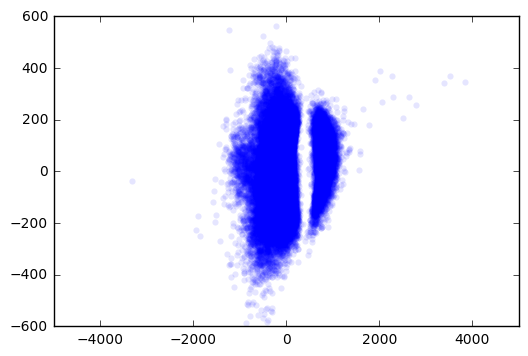

In [15]:
plt.scatter(reduced_data[0:100000,0],reduced_data[0:100000,1],alpha=0.1,lw = 0)
plt.xlim([-5000,5000])
plt.ylim([-600,600])

In [16]:
spikes.shape

(4, 64, 27813540)

In [276]:
ch1pcs = PCA(n_components=2,whiten=False).fit_transform(spikes[0,:,0:10000].T)

(-2000, 2000)

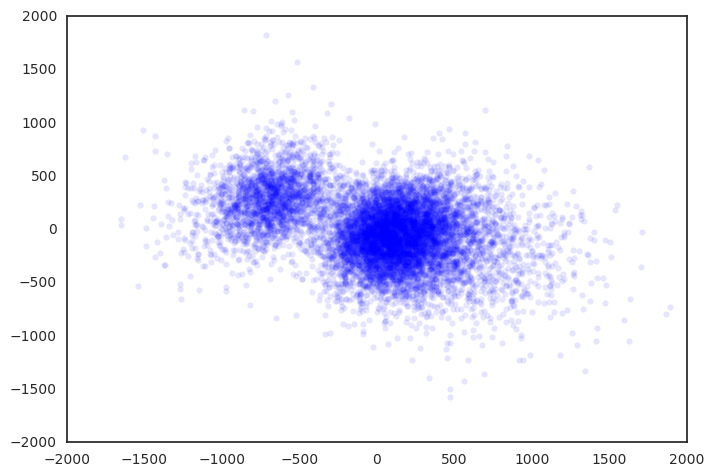

In [277]:
plt.scatter(ch1pcs[:,0],ch1pcs[:,1],alpha=0.1,lw = 0)
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

In [12]:
ch2pcs = PCA(n_components=2).fit_transform(spikes[1,:,0:10000].T)

(-2000, 2000)

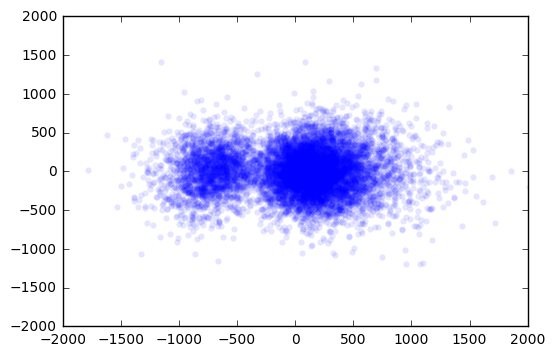

In [13]:
plt.scatter(ch2pcs[:,0],ch2pcs[:,1],alpha=0.1,lw = 0)
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

In [14]:
ch3pcs = PCA(n_components=2).fit_transform(spikes[2,:,0:10000].T)

(-2000, 2000)

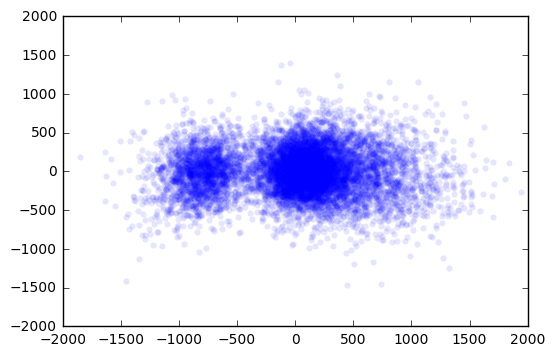

In [15]:
plt.scatter(ch3pcs[:,0],ch3pcs[:,1],alpha=0.1,lw = 0)
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

In [16]:
ch4pcs = PCA(n_components=2).fit_transform(spikes[3,:,0:10000].T)

(-2000, 2000)

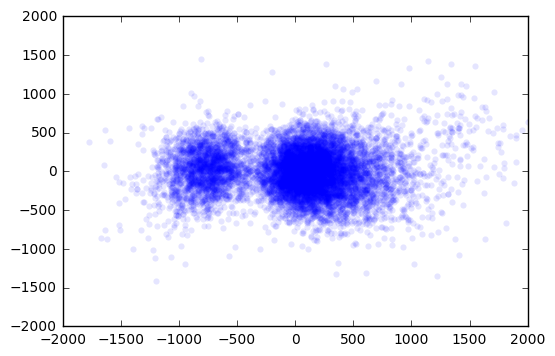

In [17]:
plt.scatter(ch4pcs[:,0],ch4pcs[:,1],alpha=0.1,lw = 0)
plt.xlim([-2000,2000])
plt.ylim([-2000,2000])

In [18]:
all_features = np.vstack([peaks[0:10000,:].T,ch1pcs.T,ch2pcs.T,ch3pcs.T,ch4pcs.T])

In [19]:
all_features.shape

(12, 10000)

In [233]:
all_pcs = np.vstack([ch1pcs.T,ch2pcs.T,ch3pcs.T,ch4pcs.T])

In [234]:
all_pcs.shape

(8, 10000)

In [ ]:
gmm = mixture.GaussianMixture()

In [269]:
dpgmm = mixture.BayesianGaussianMixture(n_components=6,
                                        covariance_type='full',verbose=1,max_iter=1000).fit(all_pcs.T)


Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
  Iteration 370
  Iteration 380
  Iteration 390
  Iteration 400
  Iteration 410
  Iteration 420
  Iteration 430
  Iteration 440
  Iteration 450
  Iteration 460
  Iteration 470
  Iteration 480
  Iteration 490
  Iteration 500
  Iteration 510
  Iteration 520
  Iteration 530
  Iteration 540
  Iteration 550
  Iteration 560
  Iteration 570
  Iteration 580
  Iteration 590
  Iteration 600
  Iteration 610
  

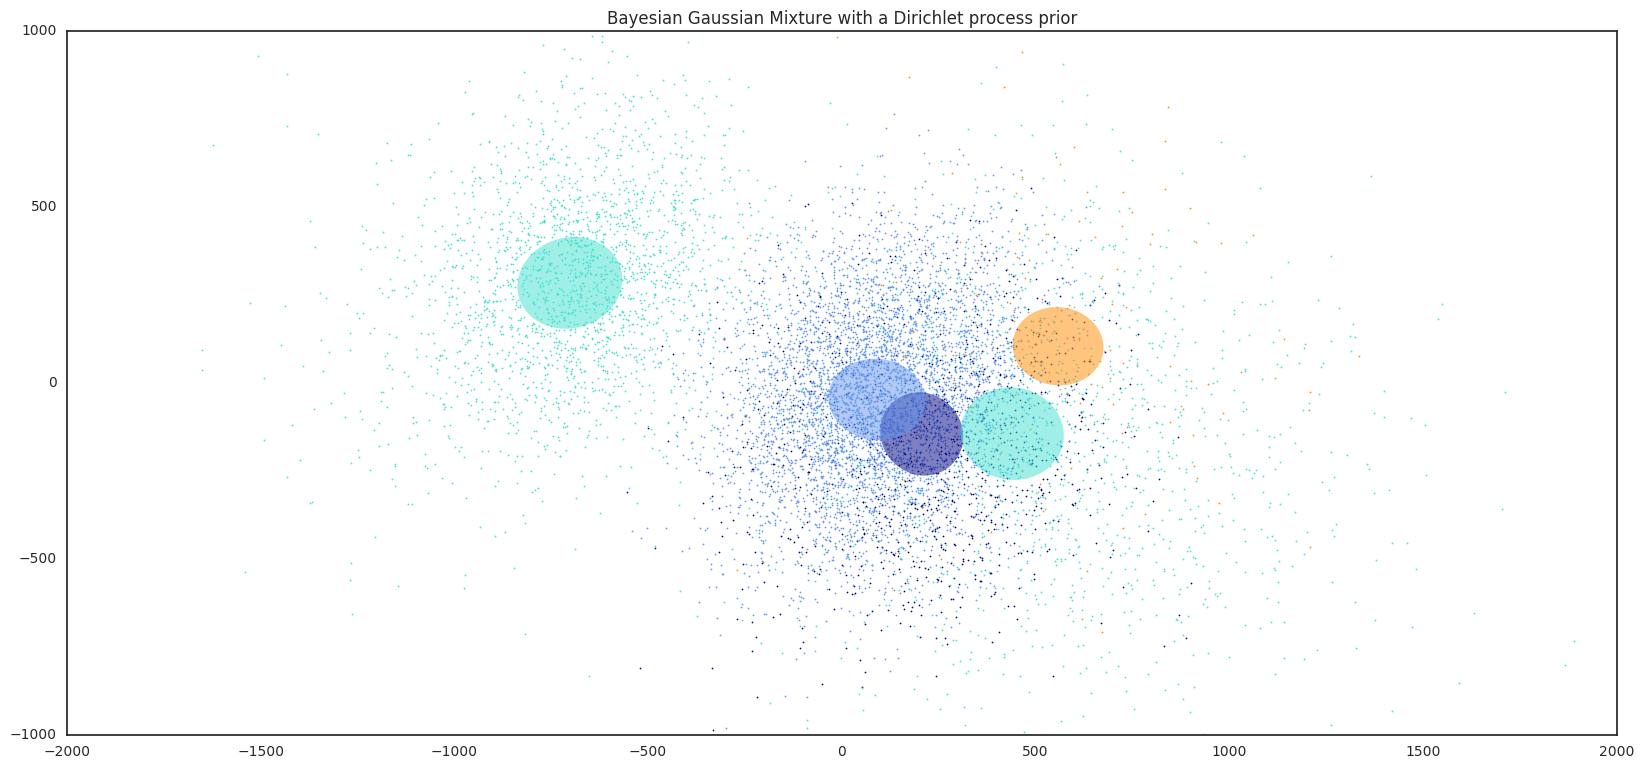

In [270]:
plot_results(all_pcs.T, dpgmm.predict(all_pcs.T), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

In [271]:
dpgmm.n_components

6

In [37]:
dpgmm.means_

array([[ -199.51611709,  -264.51845465,  -189.09884089,  -263.6452663 ,
           85.86061285,   -48.69282487,   195.53979966,   -17.72010766,
           35.88433102,     3.82346139,   152.62957253,   -14.67361729],
       [ -229.78484734,  -165.80413598,  -249.61511846,  -174.1409413 ,
          112.78879935,   -50.58719911,    61.89690643,     7.52019529,
          114.94521183,    28.72712066,    39.24068714,    10.56025835],
       [  198.9103863 ,   188.99691716,   211.68069014,   200.62732206,
         -697.45282307,   285.05492696,  -719.79467727,    12.74105602,
         -799.0502472 ,   -18.52421852,  -773.00517657,    29.14368976],
       [ -318.93788803,  -273.33662269,  -412.78568465,  -328.39323109,
          386.21174294,  -164.88130303,   339.65201674,   -14.773912  ,
          559.6143854 ,   -35.55050814,   418.89879956,   -48.22707017],
       [ -261.86607453,  -277.87886015,  -218.62321842,  -698.87791557,
          582.91131035,   236.07701697,   426.1526095 ,   27

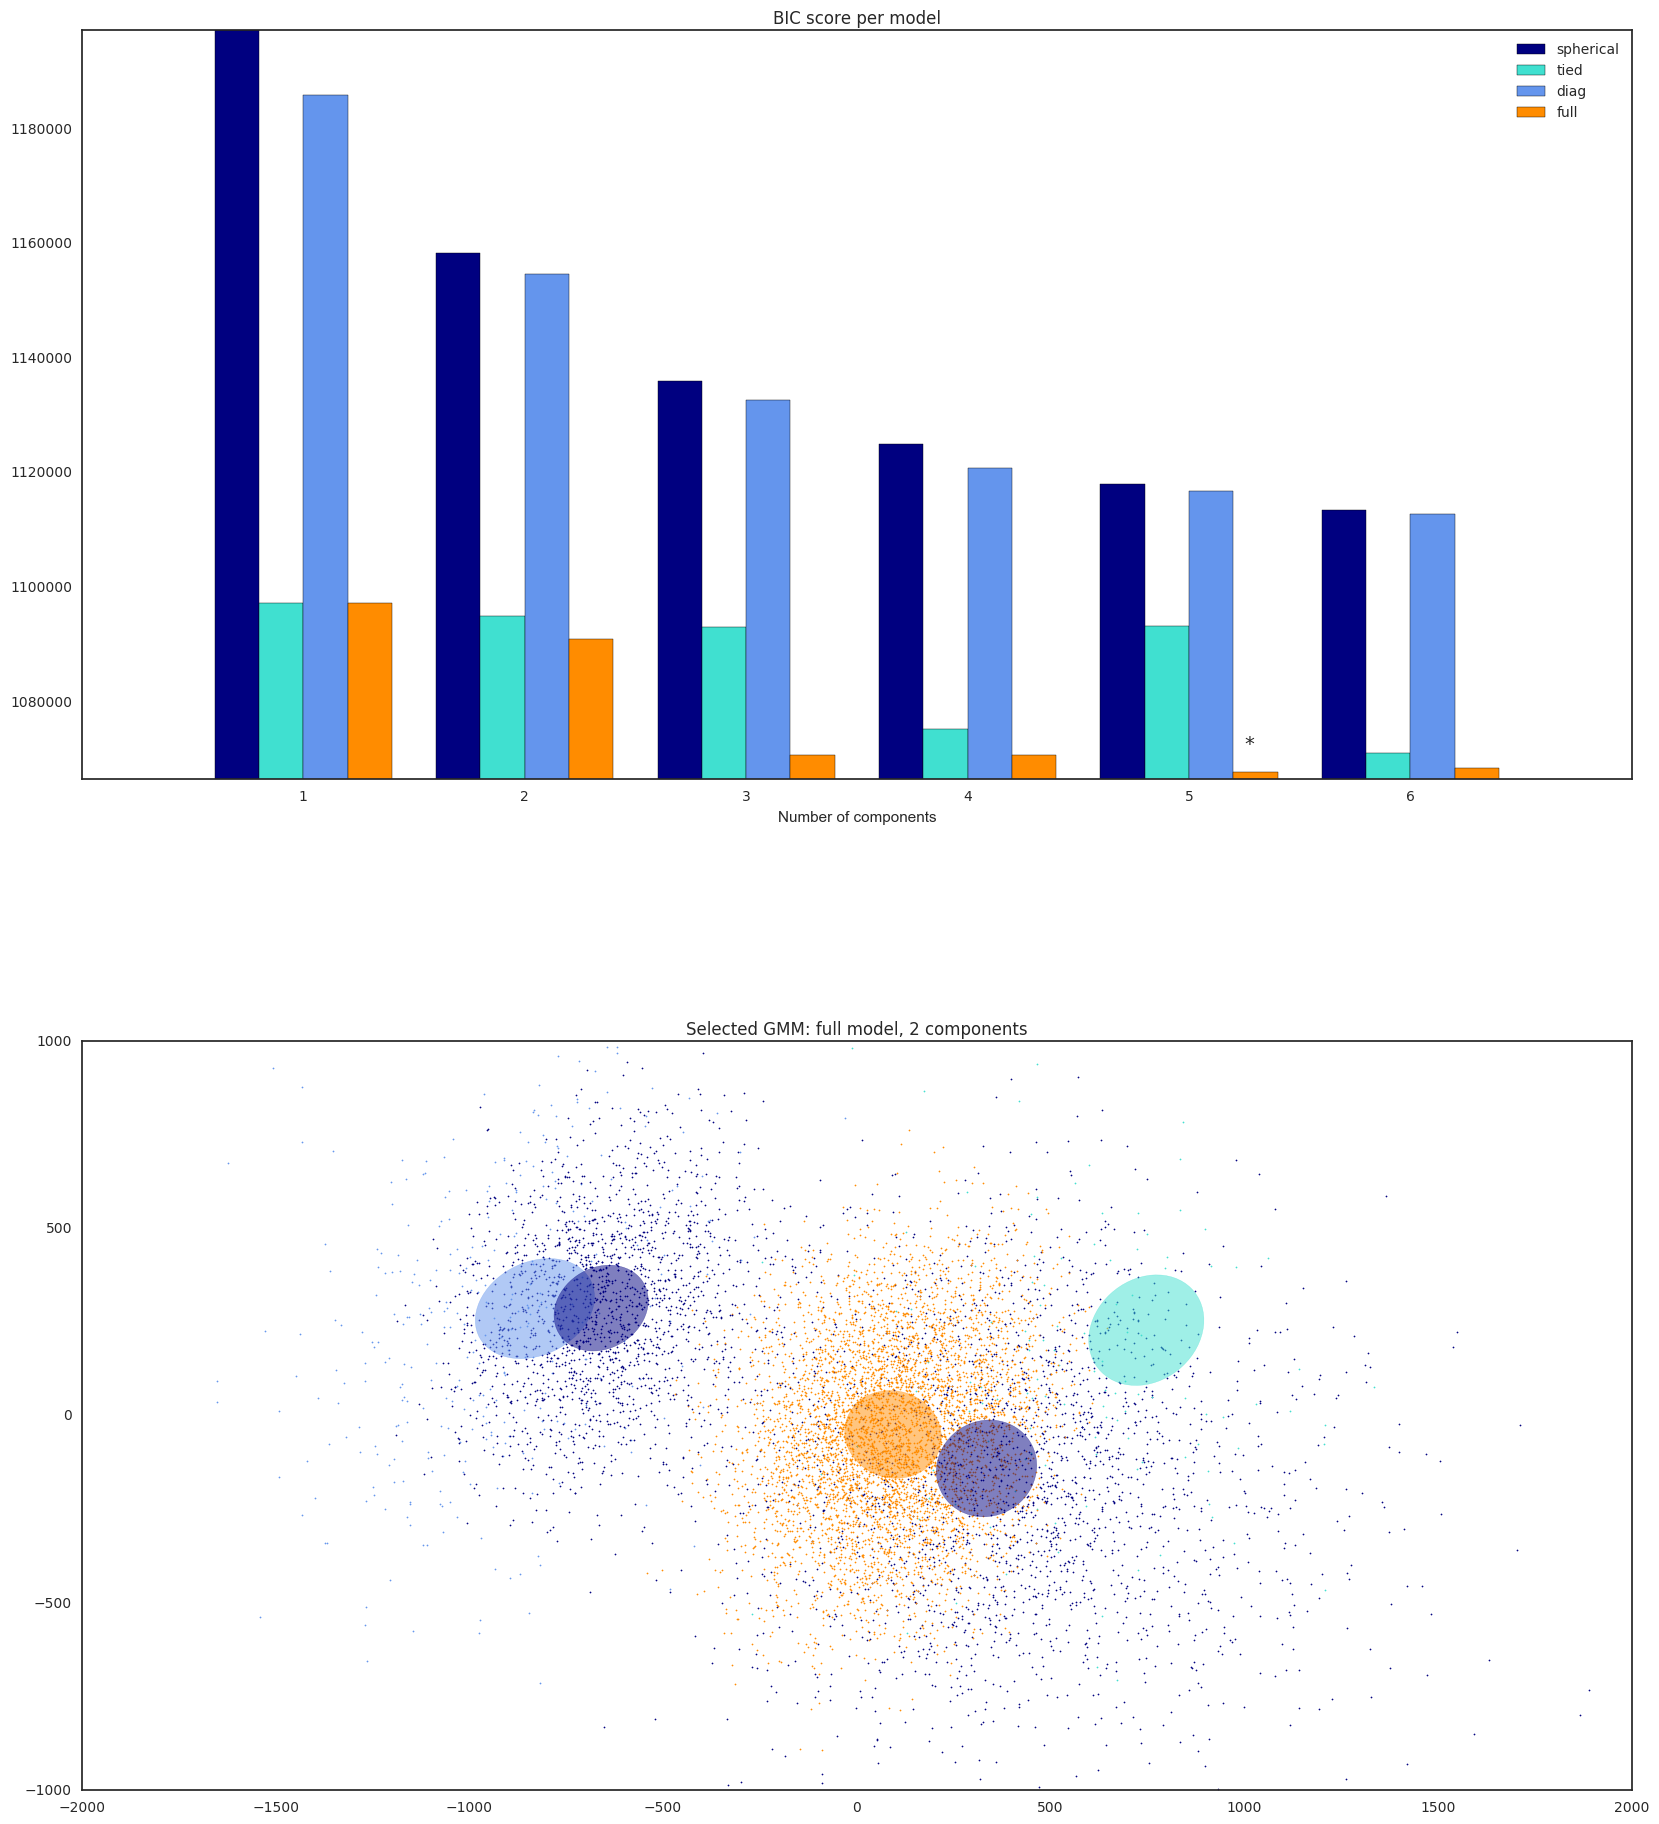

In [239]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type,max_iter=1000)
        gmm.fit(all_pcs.T)
        bic.append(gmm.bic(all_pcs.T))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(20,20))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(all_pcs.T)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(all_pcs.T[Y_ == i, 0], all_pcs.T[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

#plt.xticks(())
#plt.yticks(())
plt.xlim([-2000,2000])
plt.ylim([-1000,1000])
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [68]:
reduced_features = PCA(n_components=2).fit_transform(all_features.T)

In [69]:
reduced_features.shape

(10000, 2)

(-2000, 2000)

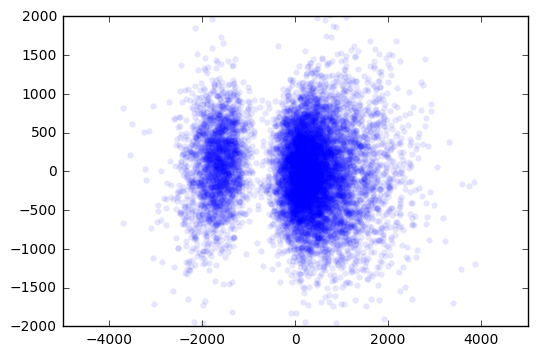

In [71]:
plt.scatter(reduced_features[:,0],reduced_features[:,1],alpha=0.1,lw = 0)
plt.xlim([-5000,5000])
plt.ylim([-2000,2000])

(-1000, 600)

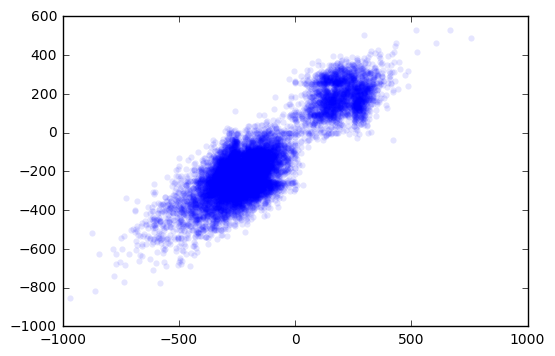

In [75]:
plt.scatter(all_features.T[:,0],all_features.T[:,1],alpha=0.1,lw = 0)
plt.xlim([-1000,1000])
plt.ylim([-1000,600])

(-1000, 600)

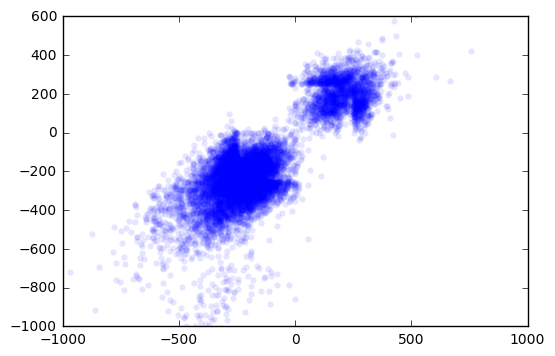

In [77]:
plt.scatter(all_features.T[:,0],all_features.T[:,3],alpha=0.1,lw = 0)
plt.xlim([-1000,1000])
plt.ylim([-1000,600])

(-2000, 2000)

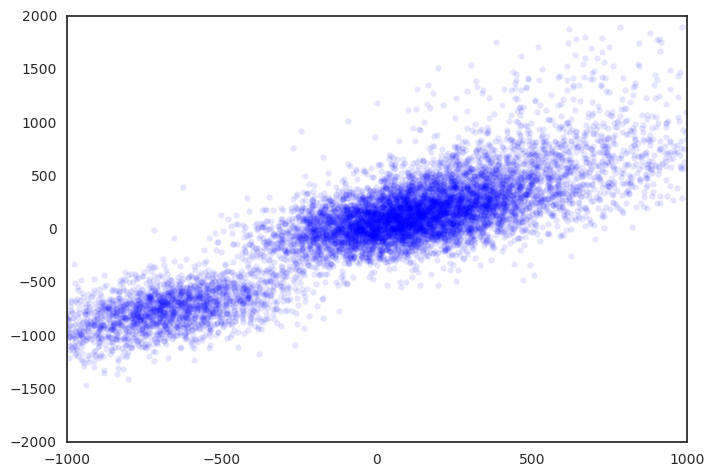

In [160]:
plt.scatter(all_features.T[:,4],all_features.T[:,10],alpha=0.1,lw = 0)
plt.xlim([-1000,1000])
plt.ylim([-2000,2000])

In [252]:
clust1spikes = np.squeeze(spikes[:,:,np.where(Y_==0)])

In [253]:
clust2spikes = np.squeeze(spikes[:,:,np.where(Y_==1)])

In [254]:
clust3spikes = np.squeeze(spikes[:,:,np.where(Y_==2)])

In [255]:
clust4spikes = np.squeeze(spikes[:,:,np.where(Y_==3)])

In [256]:
clust5spikes = np.squeeze(spikes[:,:,np.where(Y_==4)])

In [135]:
print 'num spikes in each cluster:', clust4spikes.shape

num spikes in each cluster: (4, 64, 1, 2522)


In [83]:
spikes.shape

(4, 64, 27813540)

In [161]:
clust1spikes.shape

(4, 64, 2949)

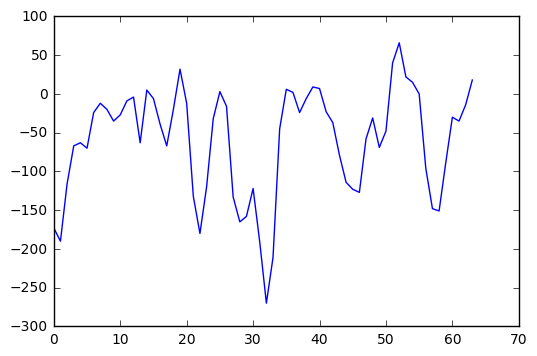

In [86]:
plt.plot(range(64),clust1spikes[0,:,1])

In [184]:
def plot_waveforms(spikes,clust_name):

    # spikes shape = e.g. (4, 64, 2949)

    fig = plt.figure(figsize=(20, 5)) 
    gs = gridspec.GridSpec(1, 1, width_ratios=[1, 1]) 
    ax1 = plt.subplot(gs[0])
    channels = spikes.shape[0]
    num_samples =spikes.shape[1]
    time_vec = range(channels*num_samples)

    allchans_avg = np.empty([channels*num_samples])
    allchans_std = np.empty([channels*num_samples])
    
    for i in range(channels):
         
        
        storewindows = spikes[i,:,:]  
        
        win_avg = np.mean(storewindows,axis=1)
        win_std = np.std(storewindows,axis=1)
        
        allchans_avg[i*(64):(i+1)*64] = win_avg
        allchans_std[i*(64):(i+1)*64] = win_std
        
    print len(allchans_avg)
    print type(allchans_avg)
    ax1 = errorfill(time_vec,allchans_avg,allchans_std)

    ax1 = sns.set_style("white")
    sns.despine()
    #plt.show()

    fig.tight_layout()

    fig.savefig("spikes.pdf")

In [110]:
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.prop_cycler.next()
        color= color['color']
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr

    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [177]:
color = ax._get_lines.prop_cycler.next()

256
<type 'numpy.ndarray'>


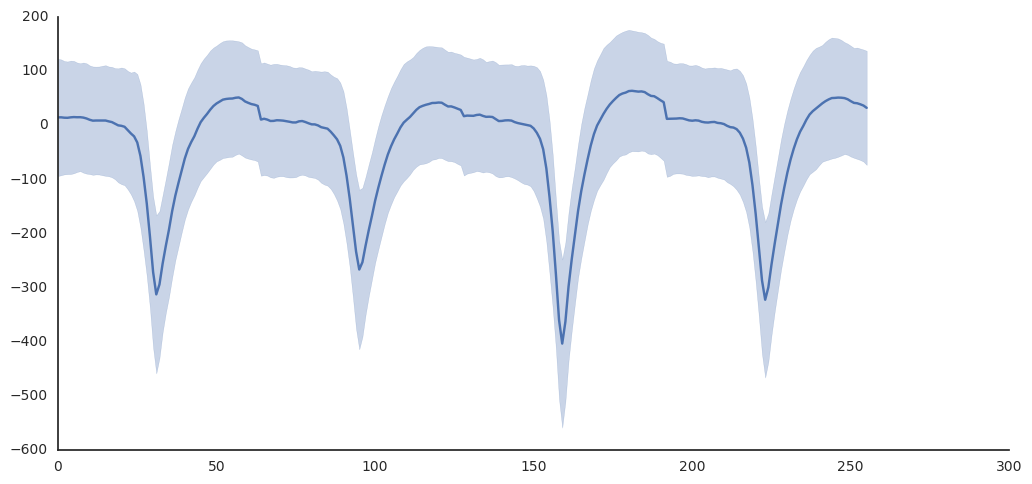

In [257]:
plot_waveforms(clust1spikes,'0')

256
<type 'numpy.ndarray'>


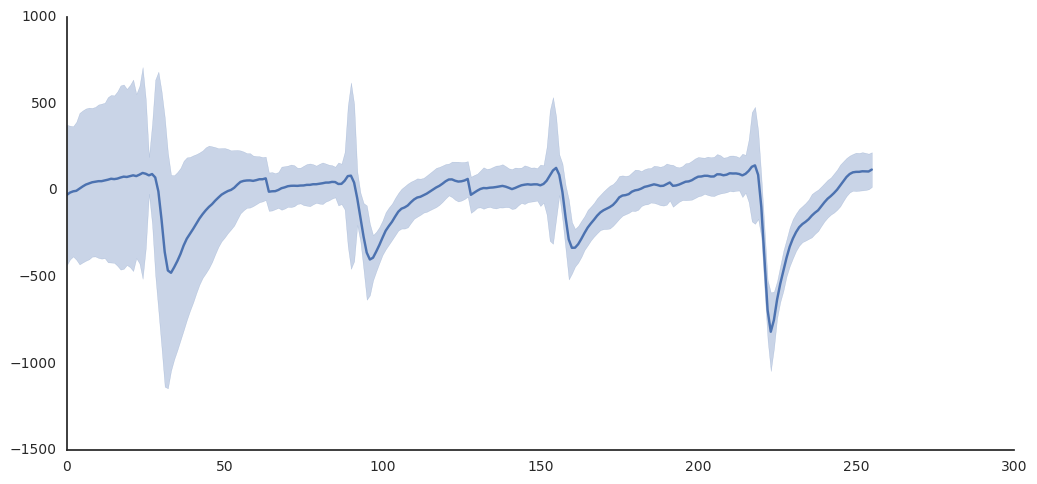

In [258]:
plot_waveforms(clust2spikes,'2')

256
<type 'numpy.ndarray'>


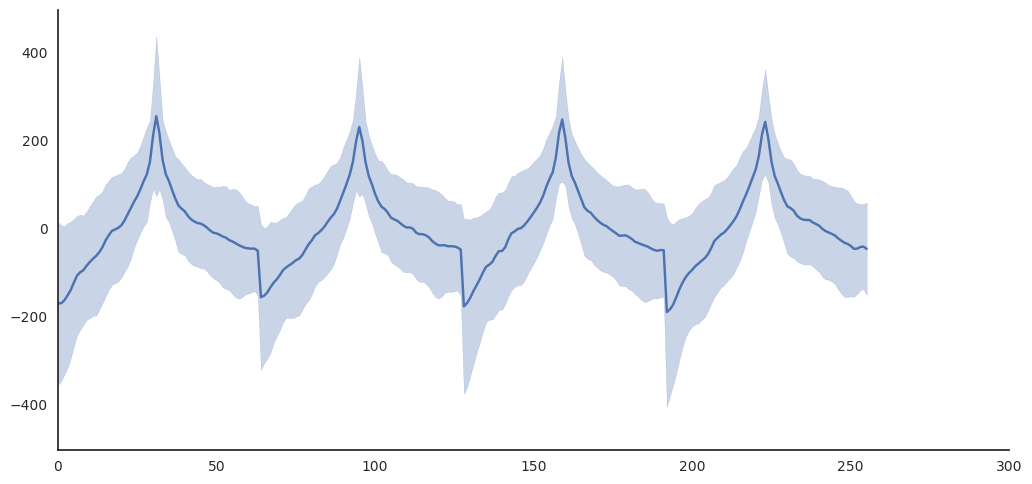

In [259]:
plot_waveforms(clust3spikes,'0')

256
<type 'numpy.ndarray'>


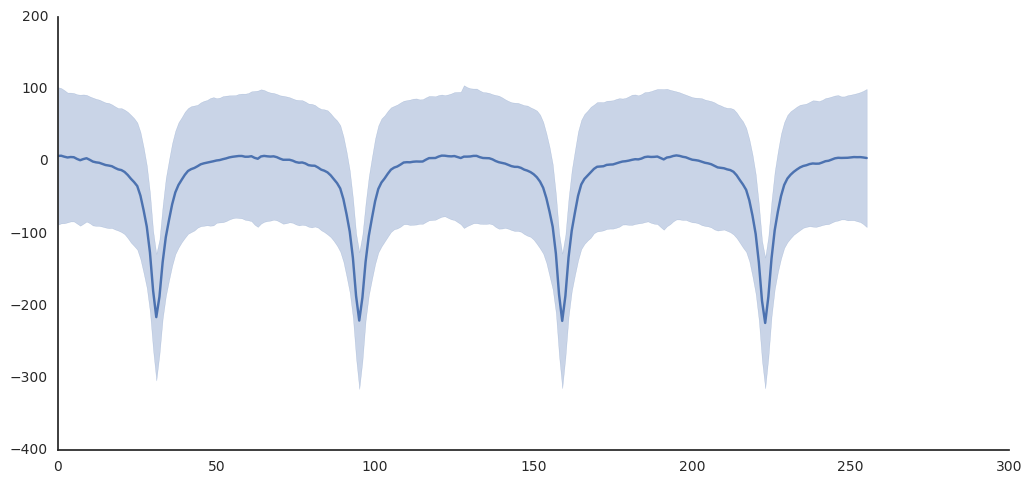

In [260]:
plot_waveforms(clust4spikes,'0')

256
<type 'numpy.ndarray'>


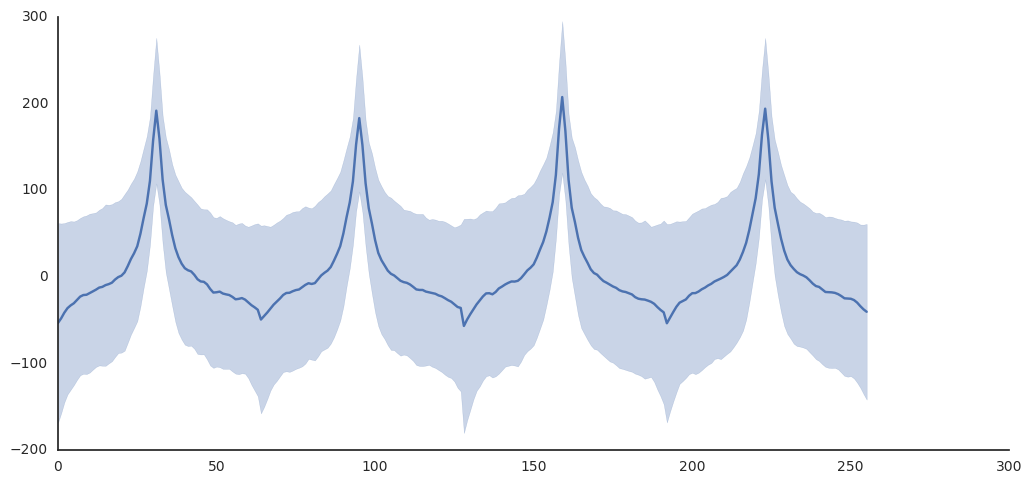

In [261]:
plot_waveforms(clust5spikes,'0')

In [192]:
import plotly.plotly as py
import plotly.graph_objs as go

In [249]:
trace = []
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    if not np.any(Y_ == i):
        continue
    #plt.scatter(all_features.T[Y_ == i, 0], all_features.T[Y_ == i, 1], .8, color=color)

    
    
    
    temp_trace = go.Scatter3d(
        x=all_pcs.T[Y_ == i, 0], #x,
        y=all_pcs.T[Y_ == i, 4], #y,
        z=all_pcs.T[Y_ == i, 6], #z,
        mode='markers',
        marker=dict(
            size=1,
            line=dict(
                color=color,
                #width=0.5
            ),
            opacity=0.8
        )
    )
    trace.append(temp_trace)

data = trace
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [250]:
fig = go.Figure(data=data, layout=layout)

In [251]:
py.iplot(fig, filename='simple-3d-scatter')

In [ ]:
py.

In [203]:
import plotly.tools as tls
tls.set_credentials_file(username='guitchounts', api_key='s4P3RrzIeW9GlMWJTjOD')

In [216]:
all_features.shape

(12, 10000)

In [278]:
import plotly

In [279]:
plotly.__version__

'1.12.9'